In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


In [2]:
# Features: [Weight (grams), Size (diameter in cm)]
X = np.array([
    [150, 7], [160, 7.5], [170, 8],  # Apples
    [130, 6], [140, 6.5], [120, 5.5] # Oranges
])

# Labels: 0 for Orange, 1 for Apple
y = np.array([1, 1, 1, 0, 0, 0])  


Text(0, 0.5, 'Size (diameter in cm)')

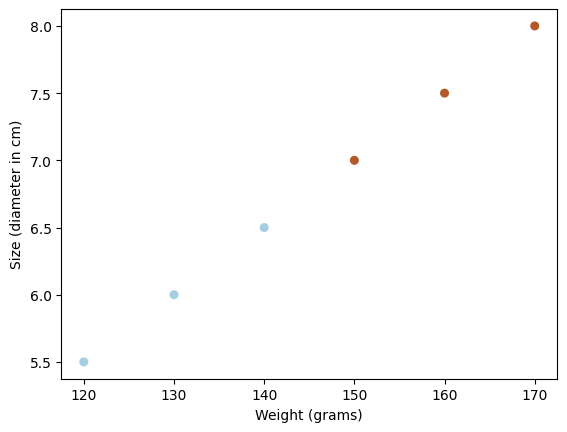

In [3]:
# visualize the points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
plt.xlabel('Weight (grams)')
plt.ylabel('Size (diameter in cm)')


In [5]:
# Create an SVM classifier
clf = svm.SVC(kernel='linear')  # Linear Kernel for classification

# Train the model
clf.fit(X, y)


SVC(kernel='linear')

In [6]:
# Predict a new fruit: Weight = 145g, Size = 6.2cm
new_fruit = np.array([[145, 6.2]])
prediction = clf.predict(new_fruit)

# Print the prediction result
if prediction == 1:
    print("Predicted: Apple 🍏")
else:
    print("Predicted: Orange 🍊")


Predicted: Orange 🍊


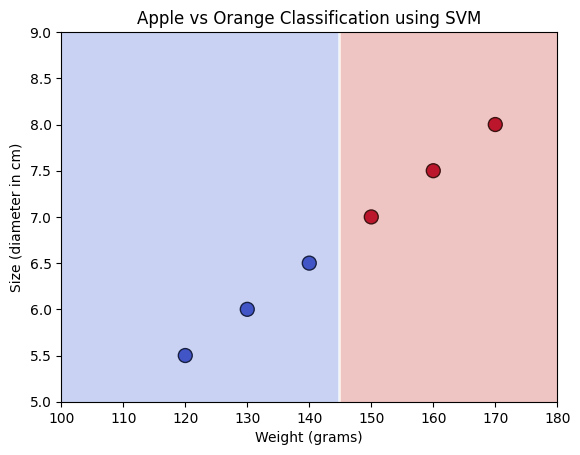

In [7]:
# Plot Data Points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100)
plt.xlabel("Weight (grams)")
plt.ylabel("Size (diameter in cm)")

# Create grid for decision boundary
xx, yy = np.meshgrid(np.linspace(100, 180, 100), np.linspace(5, 9, 100))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.title("Apple vs Orange Classification using SVM")
plt.show()


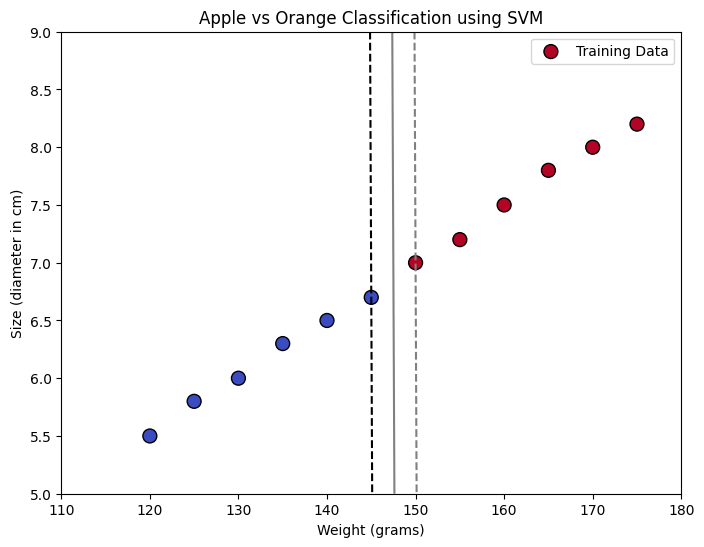

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generate a larger dataset with more features
# Features: [Weight (grams), Size (diameter in cm)]
X = np.array([
    [150, 7], [160, 7.5], [170, 8], [155, 7.2], [165, 7.8], [175, 8.2],  # Apples
    [130, 6], [140, 6.5], [120, 5.5], [135, 6.3], [125, 5.8], [145, 6.7] # Oranges
])

# Labels: 0 for Orange, 1 for Apple
y = np.array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

# Create an SVM classifier with a linear kernel
clf = svm.SVC(kernel='linear', C=1.0)  # Linear SVM
clf.fit(X, y)  # Train the model

# Create a grid for decision boundary visualization
xx, yy = np.meshgrid(np.linspace(110, 180, 500), np.linspace(5, 9, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the dataset points
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', s=100, label="Training Data")
plt.xlabel("Weight (grams)")
plt.ylabel("Size (diameter in cm)")

# Plot decision boundary and margins
plt.contour(xx, yy, Z, colors=['black', 'gray', 'gray'], levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])

# Highlight the support vectors
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=150, label="Support Vectors")

plt.title("Apple vs Orange Classification using SVM")
plt.legend()
plt.show()


In [20]:
# calculate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y, clf.predict(X))

1.0

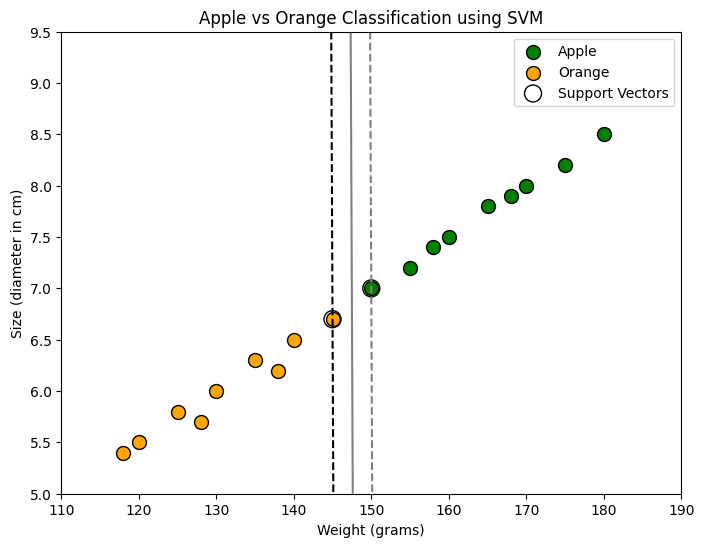

In [25]:
# Generate a larger dataset with more data points for Apples and Oranges
X_extended = np.array([
    [150, 7], [160, 7.5], [170, 8], [155, 7.2], [165, 7.8], [175, 8.2], [158, 7.4], [168, 7.9], [180, 8.5], # Apples
    [130, 6], [140, 6.5], [120, 5.5], [135, 6.3], [125, 5.8], [145, 6.7], [138, 6.2], [128, 5.7], [118, 5.4]  # Oranges
])

# Labels: 0 for Orange, 1 for Apple
y_extended = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1,  # Apples
                        0, 0, 0, 0, 0, 0, 0, 0, 0]) # Oranges

# Create an SVM classifier with a linear kernel
clf_extended = svm.SVC(kernel='linear', C=1.0)  # Linear SVM
clf_extended.fit(X_extended, y_extended)  # Train the model

# Create a grid for decision boundary visualization
xx_ext, yy_ext = np.meshgrid(np.linspace(110, 190, 500), np.linspace(5, 9.5, 500))
Z_ext = clf_extended.decision_function(np.c_[xx_ext.ravel(), yy_ext.ravel()])
Z_ext = Z_ext.reshape(xx_ext.shape)

# Plot the dataset points with new colors for Apples and Oranges
plt.figure(figsize=(8, 6))

# Define colors for Apples and Oranges
apple_color = 'green'   # Green for Apples
orange_color = 'orange' # Orange for Oranges

# Plot Apples (Class 1) and Oranges (Class 0) separately with new colors
for i, label in enumerate(y_extended):
    if label == 1:
        plt.scatter(X_extended[i, 0], X_extended[i, 1], color=apple_color, edgecolors='k', s=100, label="Apple" if i == 0 else "")
        # plt.text(X_extended[i, 0] + 0.5, X_extended[i, 1], "Apple", fontsize=8, verticalalignment='bottom', color=apple_color)
    else:
        plt.scatter(X_extended[i, 0], X_extended[i, 1], color=orange_color, edgecolors='k', s=100, label="Orange" if i == 9 else "")
        # plt.text(X_extended[i, 0] + 0.5, X_extended[i, 1], "Orange", fontsize=8, verticalalignment='bottom', color=orange_color)

plt.xlabel("Weight (grams)")
plt.ylabel("Size (diameter in cm)")

# Plot decision boundary and margins
plt.contour(xx_ext, yy_ext, Z_ext, colors=['black', 'gray', 'gray'], levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])

# Highlight the support vectors
plt.scatter(clf_extended.support_vectors_[:, 0], clf_extended.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=150, label="Support Vectors")

plt.title("Apple vs Orange Classification using SVM")
plt.legend()
plt.show()


Text(0, 0.5, 'Size (diameter in cm)')

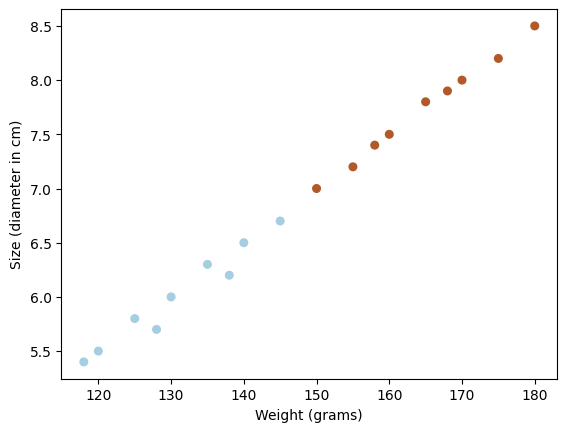

In [19]:
# visualize the points
plt.scatter(X_extended[:, 0], X_extended[:, 1], c=y_extended, s=30, cmap=plt.cm.Paired)
plt.xlabel('Weight (grams)')
plt.ylabel('Size (diameter in cm)')


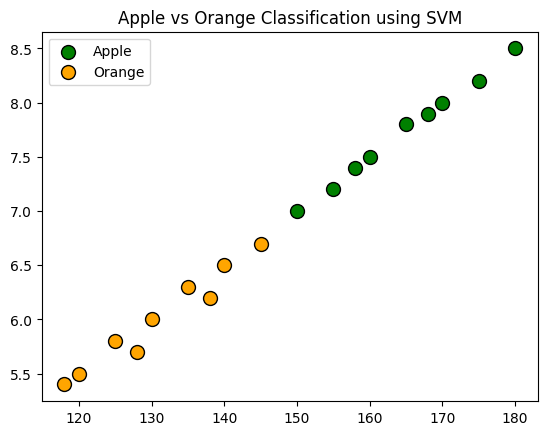

In [24]:
# Define colors for Apples and Oranges
apple_color = 'green'   # Green for Apples
orange_color = 'orange' # Orange for Oranges

# Plot Apples (Class 1) and Oranges (Class 0) separately with new colors
for i, label in enumerate(y_extended):
    if label == 1:
        plt.scatter(X_extended[i, 0], X_extended[i, 1], color=apple_color, edgecolors='k', s=100, label="Apple" if i == 0 else "")
        # plt.text(X_extended[i, 0] + 0.5, X_extended[i, 1], "Apple", fontsize=8, verticalalignment='bottom', color=apple_color)
    else:
        plt.scatter(X_extended[i, 0], X_extended[i, 1], color=orange_color, edgecolors='k', s=100, label="Orange" if i == 9 else "")
        # plt.text(X_extended[i, 0] + 0.5, X_extended[i, 1], "Orange", fontsize=8, verticalalignment='bottom', color=orange_color)

plt.title("Apple vs Orange Classification using SVM")
plt.legend()
plt.show()
